In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

%config InlineBackend.figure_format='retina'

In [3]:
df = pd.read_csv('steam/steam.csv')
df['temperature'] = pd.to_numeric(df['temperature'], errors = 'coerce')

In [4]:
cols = list(df.columns)
cols = [i.replace(' ', '_') for i in cols]
df.columns = cols

In [5]:
df.shape

(398, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [7]:
df2 = df.sample(25, random_state = 1)

In [8]:
df2['steam'].mean()

22.68

### Normal model fit example

In [9]:
# Fit linear reg model
model = smf.ols('steam ~ temperature', data = df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     46.57
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           5.85e-07
Time:                        17:03:01   Log-Likelihood:                -70.472
No. Observations:                  25   AIC:                             144.9
Df Residuals:                      23   BIC:                             147.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.2151      2.428     15.737      0.000      33.192      43.239
horsepower    -0.1469      0.022     -6.824      0.000      -0.191      -0.102
==============================================================================
Omnibus:                        1.908   Durbin-Watson:                   2.596
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.430
Skew:                           0.576   Prob(JB):                        0.489
Kurtosis:                       2.788   Cond. No.                         324.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

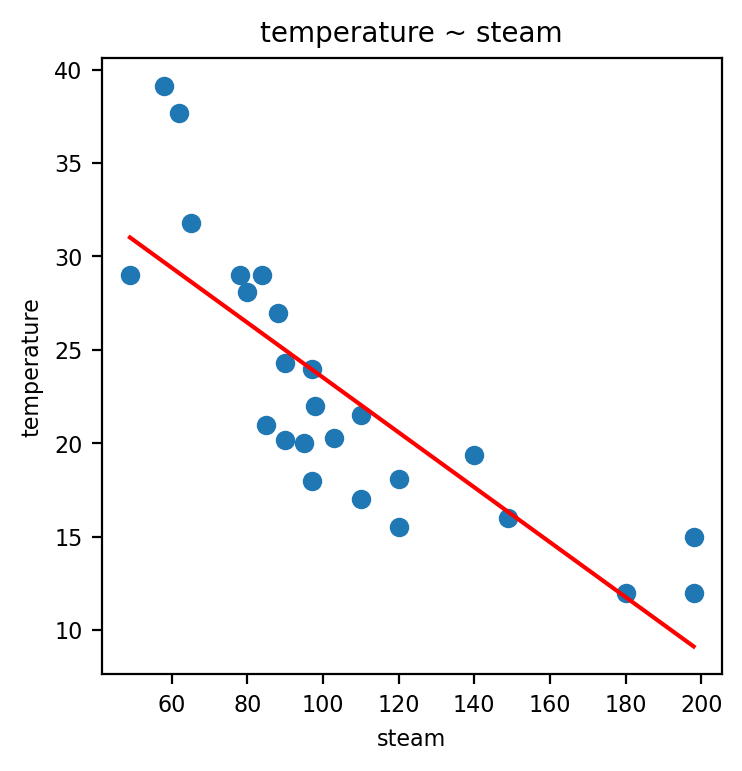

In [10]:
fig, ax = plt.subplots(figsize = (4, 4))

ax.scatter(df2['temperature'], df2['steap'])
xseq = np.linspace(df2['temperature'].min(), df2['temperature'].max(), num = 340)
ax.plot(xseq, 38.2151 - 0.1469 * xseq, color = "red", lw = 1.5)
ax.set_xlabel('steam', fontsize = 8)
ax.set_ylabel('temperature', fontsize = 8)
ax.set_title('temperature ~ steam', fontsize = 10)
plt.tick_params(axis = 'both', labelsize = '8')

plt.show()

### Outlier model fit example

In [11]:
df3 = df2.copy()
df3['steam'] = np.where(df3['temperature'] == 198, 35, df3['steam'])

In [12]:
# Fit linear reg model
model = smf.ols('steam ~ temperature', data = df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.407
Date:                Mon, 10 Oct 2022   Prob (F-statistic):              0.248
Time:                        17:03:01   Log-Likelihood:                -84.122
No. Observations:                  25   AIC:                             172.2
Df Residuals:                      23   BIC:                             174.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0618      4.192      6.933      0.000      20.390      37.734
horsepower    -0.0441      0.037     -1.186      0.248      -0.121       0.033
==============================================================================
Omnibus:                        3.577   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                3.032
Skew:                           0.831   Prob(JB):                        0.220
Kurtosis:                       2.617   Cond. No.                         324.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

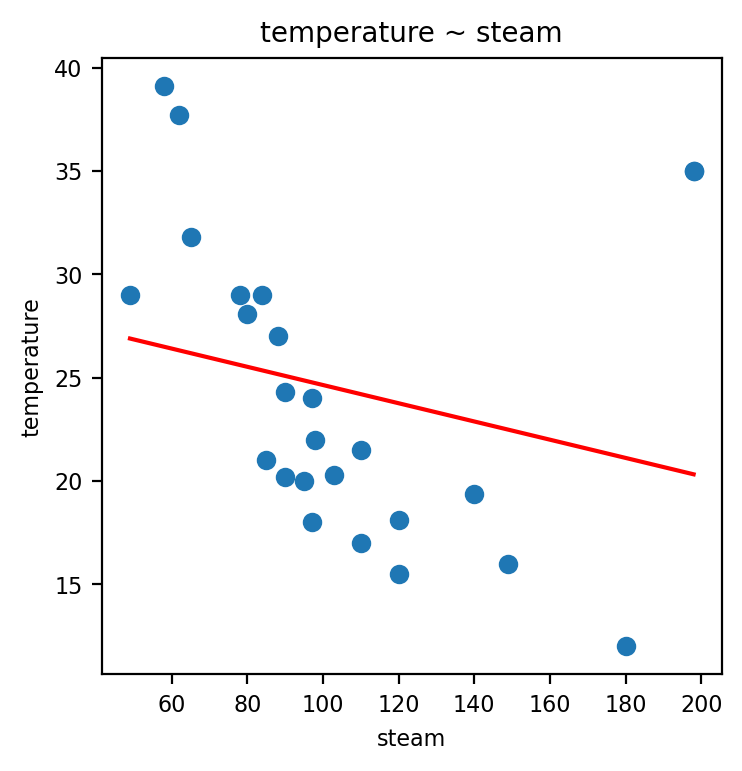

In [23]:
fig, ax = plt.subplots(figsize = (4, 4))

ax.scatter(df3['temperature'], df3['steam'])
xseq = np.linspace(df3['temperature'].min(), df3['temperature'].max(), num = 340)
ax.plot(xseq, 29.0618 - 0.0441 * xseq, color = "red", lw = 1.5)
ax.set_xlabel('steam', fontsize = 8)
ax.set_ylabel('temperature', fontsize = 8)
ax.set_title('temperature ~ steam', fontsize = 10)
plt.tick_params(axis = 'both', labelsize = '8')

plt.show()

### Missing predictor values model fit example

In [14]:
df4 = df2.copy()
df4.iloc[2:5,3] = None
df4.iloc[15:20,3] = None

In [15]:
# Fit linear reg model
model = smf.ols('steam ~ temperature', data = df4).fit()
model.summary()

/Users/ensun.pak/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     39.17
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           1.53e-05
Time:                        17:03:02   Log-Likelihood:                -47.239
No. Observations:                  17   AIC:                             98.48
Df Residuals:                      15   BIC:                             100.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.2317      3.248     13.309      0.000      36.308      50.155
horsepower    -0.1983      0.032     -6.259      0.000      -0.266      -0.131
==============================================================================
Omnibus:                        0.468   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.568
Skew:                           0.216   Prob(JB):                        0.753
Kurtosis:                       2.216   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

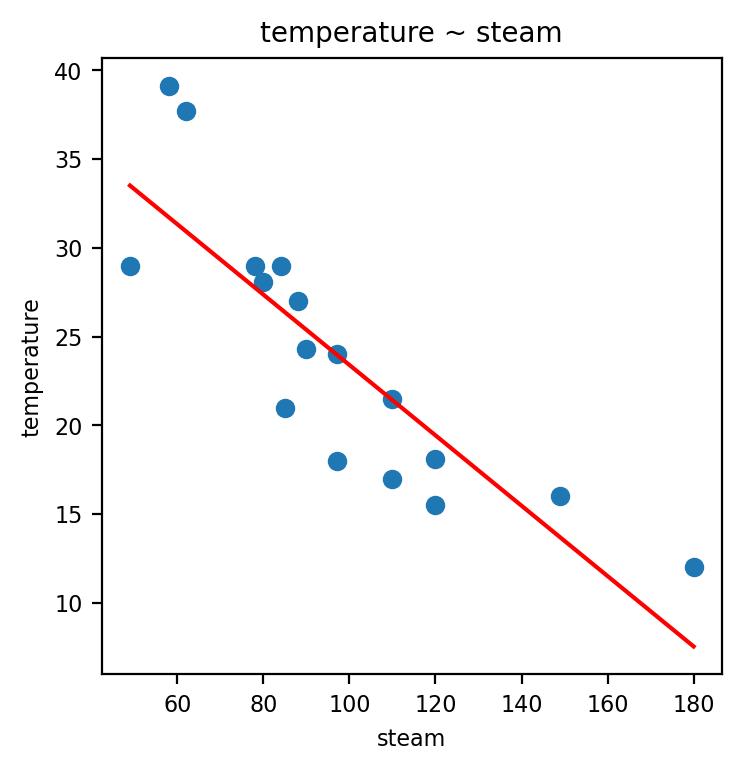

In [24]:
fig, ax = plt.subplots(figsize = (4, 4))

ax.scatter(df4['temperature'], df4['steam'])
xseq = np.linspace(df3['temperature'].min(), df4['temperature'].max(), num = 340)
ax.plot(xseq, 43.2317 - 0.1983 * xseq, color = "red", lw = 1.5)
ax.set_xlabel('steam', fontsize = 8)
ax.set_ylabel('temperature', fontsize = 8)
ax.set_title('temperature ~ steam', fontsize = 10)
plt.tick_params(axis = 'both', labelsize = '8')

plt.show()

### All charts

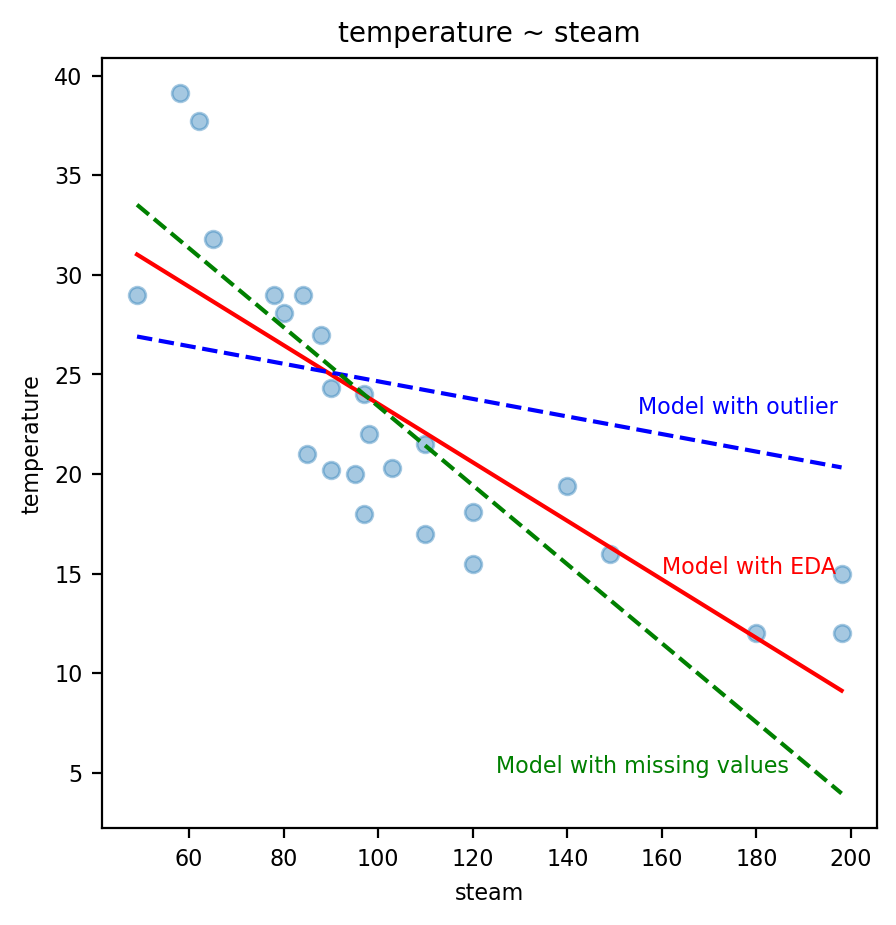

In [25]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(df2['temperature'], df2['mpg'], alpha = 0.4)
xseq = np.linspace(df2['temperature'].min(), df2['temperature'].max(), num = 340)
ax.plot(xseq, 38.2151 - 0.1469 * xseq, color = "red", lw = 1.5)
ax.text(160, 15, 'Model with EDA', size = 8, color = 'red')

# With outlier only
xseq2 = np.linspace(df3['temperature'].min(), df3['temperature'].max(), num = 340)
ax.plot(xseq, 29.0618 - 0.0441 * xseq, color = "blue", lw = 1.5, linestyle = '--')
ax.text(155, 23, 'Model with outlier', size = 8, color = 'blue')

# Without outlier; with missing hp values
xseq3 = np.linspace(df4['temperature'].min(), df4['temperature'].max(), num = 340)
ax.plot(xseq, 43.2317 - 0.1983 * xseq, color = "green", lw = 1.5 , linestyle = '--')
ax.text(125, 5, 'Model with missing values', size = 8, color = 'green')

ax.set_xlabel('steam', fontsize = 8)
ax.set_ylabel('temperature', fontsize = 8)
ax.set_title('temperature ~ steam', fontsize = 10)
plt.tick_params(axis = 'both', labelsize = 8)

plt.show()

### Categorical variable impact example - MLR only

Impact is quite minimal towards R^2 and adj-R^2. However, there is some impact to global F stat

In [18]:
# Fit linear reg model with categorical origin
model = smf.ols('mpg ~ horsepower + C(origin)', data = df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     30.07
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           8.64e-08
Time:                        17:03:02   Log-Likelihood:                -63.474
No. Observations:                  25   AIC:                             134.9
Df Residuals:                      21   BIC:                             139.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         31.7364      2.757     11.510      0.000      26.002      37.471
C(origin)[T.2]     2.4314      1.823      1.334      0.197      -1.360       6.223
C(origin)[T.3]     8.0560      2.044      3.941      0.001       3.805      12.307
horsepower        -0.1064      0.021     -5.115      0.000      -0.150      -0.063
==============================================================================
Omnibus:                        1.589   Durbin-Watson:                   2.676
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                1.321
Skew:                           0.397   Prob(JB):                        0.517
Kurtosis:                       2.201   Cond. No.                         567.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Fit linear reg model with continuous origin
model = smf.ols('mpg ~ horsepower + origin', data = df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     44.74
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           1.77e-08
Time:                        17:03:02   Log-Likelihood:                -64.023
No. Observations:                  25   AIC:                             134.0
Df Residuals:                      22   BIC:                             137.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.1675      3.449      7.877      0.000      20.014      34.321
horsepower    -0.1030      0.020     -5.030      0.000      -0.145      -0.061
origin         3.9034      1.013      3.854      0.001       1.803       6.004
==============================================================================
Omnibus:                        2.109   Durbin-Watson:                   2.831
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                1.848
Skew:                           0.598   Prob(JB):                        0.397
Kurtosis:                       2.413   Cond. No.                         600.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""